**Lab 2: Advanced Linear Programming and Sensitivity Analysis**
- Defining more complex linear programming tasks
- Learning different constraint types
- Sensitivity analysis

**Production Optimization Problem**

This program solves a linear programming problem for optimizing production of three products (A, B, and C).

The A can be for example a number of beds, B can be meters of plywood and C can be meters of low quality plywood.
Notice that it does not make sense to produce a half of a bed, so we need to use integer variables for this decision variable.

**Decision Variables:**
- unitsA: Number of units of product A to produce (integer):
- unitsB: Number of units of product B to produce
- unitsC: Number of units of product C to produce

**Objective Function:**
- Maximize profit: 400 PLN per unit A + 300 PLN per unit B + 200 PLN per unit C

**Constraints:**
- Assembly time: 0.3h per A + 0.1h per B + 0.1h per C ≤ 1800 hours
- Quality control: 0.1h per A + 0.08h per B + 0.04h per C ≤ 800 hours
- Packaging: 0.06h per A + 0.04h per B + 0.05h per C ≤ 700 hours


In [ ]:
# In Google Colab, ensure PuLP is installed:
# !pip install pulp

from pulp import (
    LpProblem,
    LpVariable,
    LpMaximize,
    LpInteger,
    LpContinuous,
    LpBinary,
    value,
    PULP_CBC_CMD
)

# 1) Create the optimization problem (maximize profit).
prob = LpProblem("Advanced_Production_Problem", LpMaximize)

# 2) Define Decision Variables
# Let's say:
#   - A (number of units of product A) is integer (like beds).
#   - B (number of units of product B) is continuous or integer, depending on your scenario.
#   - C (number of units of product C) is continuous or integer, too.

A = LpVariable("A", lowBound=0, cat=LpInteger)  # must be integer
B = LpVariable("B", lowBound=0)  # continous meters of plywood
C = LpVariable("C", lowBound=0)  # continous meters of low quality plywood

# 3) Define Objective Function
# Profit values (you can tweak these):
profit_A = 400
profit_B = 300
profit_C = 200

prob += profit_A*A + profit_B*B + profit_C*C, "Profit_Objective"

# 4) Define Constraints

# --- Resource / Time Constraints (same as the previous example, extended if desired) ---
# Example: max available hours in Assembly, Quality Control, and Packaging
prob += 0.3*A + 0.1*B + 0.1*C <= 1800, "Assembly_Hours"
prob += 0.1*A + 0.08*B + 0.04*C <= 800, "Quality_Control_Hours"
prob += 0.06*A + 0.04*B + 0.05*C <= 700, "Packaging_Hours"

# --- Minimum Demand Constraints ---
# Suppose the company must produce at least 100 units of A, 50 of B, and 80 of C to satisfy orders.
prob += A >= 100, "Min_Demand_A"
prob += B >= 50,  "Min_Demand_B"
prob += C >= 80,  "Min_Demand_C"

# --- Optional Additional Constraints ---
# For instance, if product C requires a special component that is limited:
# Let's say we have only 500 units of that component, and each unit of C consumes 1 unit of that component
# prob += C <= 500, "Special_Component_Limit"

# Alternatively, we might have a ratio constraint, e.g., for product mix synergy:
# For example, we do not want to produce more B than 2 times A
# prob += B <= 2 * A, "Mix_Ratio_Constraint"

# 5) Solve the problem
prob.writeLP("AdvancedProduction.lp")
prob.solve(PULP_CBC_CMD(msg=False))  # CBC solver

# 6) Print results
print("Status:", prob.status)
for v in prob.variables():
    print(v.name, "=", v.varValue)

print("Total profit = ", value(prob.objective))

Status: 1
A = 1894.0
B = 2948.1667
C = 9368.6667
Total profit =  3515783.3499999996


## 2. Interpreting the Extended Model



### Minimum Demand Constraints:
- E.g. `A >= 100` ensures at least 100 units of A are produced.

### Optional Constraints:
- Resource constraints, ratio constraints, or any other real-world limitations.



## 3. Performing Sensitivity Analysis

### Approach A: Manual Parameter Variation
- **Change the availability of resources:**
  - For example, reduce the 1800 hours of Assembly to 1500, solve again, and observe the new optimal solution.
- **Change the profit coefficients:**
  - If the profit for product C increases to 250, does the solution shift toward more C?
- **Change the minimum demand:**
  - If the market demands 150 units of A instead of 100, how does that affect the objective?

## Exercise 1: Minimum Demand and New Constraints

- Implement the code above and check if it finds a feasible solution.
- Alter the minimum demands:
  - Increase or decrease them to see if the solution changes drastically.
- Interpret which constraints become "binding" (fully used, the value of the constraint is equal to its limit) in the optimal solution.

In [12]:
# 1) Create the optimization problem (maximize profit).
prob = LpProblem("Advanced_Production_Problem_Altered", LpMaximize)

# 2) Define Decision Variables
A = LpVariable("A", lowBound=0, cat=LpInteger)  # must be integer
B = LpVariable("B", lowBound=0)  # continous meters of plywood
C = LpVariable("C", lowBound=0)  # continous meters of low quality plywood

# 3) Define Objective Function
profit_A = 400
profit_B = 300
profit_C = 200

prob += profit_A*A + profit_B*B + profit_C*C, "Profit_Objective"

# 4) Define Constraints
prob += 0.3*A + 0.1*B + 0.1*C <= 1800, "Assembly_Hours"
prob += 0.1*A + 0.08*B + 0.04*C <= 800, "Quality_Control_Hours"
prob += 0.06*A + 0.04*B + 0.05*C <= 700, "Packaging_Hours"

# Minimum Demand Constraints (Altered)
prob += A >= 200, "Min_Demand_A" # Increased minimum demand for A
prob += B >= 50,  "Min_Demand_B"
prob += C >= 80,  "Min_Demand_C"

# 5) Solve the problem
prob.writeLP("AdvancedProduction_Altered.lp")
prob.solve(PULP_CBC_CMD(msg=False))  # CBC solver

# 6) Print altered results
print("\n--- Altered Solution (Min Demand A = 200) ---")
print("Status:", LpStatus[prob.status])
for v in prob.variables():
    print(v.name, "=", v.varValue)
print("Total profit =", value(prob.objective))

print("\n--- Altered Constraint Slack/Surplus (Min Demand A = 200) ---")
for name, constraint in prob.constraints.items():
    print(f"{name}: {constraint.slack}")


--- Altered Solution (Min Demand A = 200) ---
Status: Optimal
A = 1894.0
B = 2948.1667
C = 9368.6667
Total profit = 3515783.3499999996

--- Altered Constraint Slack/Surplus (Min Demand A = 200) ---
Assembly_Hours: 0.11670000000003711
Quality_Control_Hours: -0.0
Packaging_Hours: -0.0
Min_Demand_A: -1694.0
Min_Demand_B: -2898.1667
Min_Demand_C: -9288.6667


## Exercise 2: Sensitivity Analysis on Resource Availability

- Create a loop that iterates over possible Assembly hours: 1600, 1800, 2000.
- For each iteration, solve the problem and record:
  - The optimal quantity of A, B, C.
  - The total profit.
- Plot or tabulate results to see the trend (if you like, e.g., in a DataFrame).

## Exercise 3 (Optional): Binary Decision Constraints

- Add a binary variable that indicates whether you open a specific production line (1) or not (0).
- If that line is closed, the hours available might be reduced or zero.
- Solve and see how the solver decides the best strategy (to open or not to open).

# Bonus:
 - Add sliders to show the values of the variables and the constraints.

In [ ]:
import ipywidgets as widgets
from IPython.display import display
from pulp import *

def solve_optimization(profit_A_value=400):
    # Create the optimization problem (maximize profit)
    prob = LpProblem("Advanced_Production_Problem", LpMaximize)

    # Define Decision Variables
    A = LpVariable("A", lowBound=0, cat=LpInteger)  # must be integer
    B = LpVariable("B", lowBound=0)  # continous meters of plywood
    C = LpVariable("C", lowBound=0)  # continous meters of low quality plywood

    # Profit values
    profit_A = profit_A_value
    profit_B = 300
    profit_C = 200

    # Define Objective Function
    prob += profit_A*A + profit_B*B + profit_C*C, "Profit_Objective"

    # Define Constraints
    # Resource / Time Constraints
    prob += 0.3*A + 0.1*B + 0.1*C <= 1800, "Assembly_Hours"
    prob += 0.1*A + 0.08*B + 0.04*C <= 800, "Quality_Control_Hours"
    prob += 0.06*A + 0.04*B + 0.05*C <= 700, "Packaging_Hours"

    # Minimum Demand Constraints
    prob += A >= 100, "Min_Demand_A"
    prob += B >= 50,  "Min_Demand_B"
    prob += C >= 80,  "Min_Demand_C"

    # Solve the problem
    prob.solve(PULP_CBC_CMD(msg=False))  # CBC solver

    # Return results
    results = {
        "status": LpStatus[prob.status],
        "A": A.varValue,
        "B": B.varValue,
        "C": C.varValue,
        "total_profit": value(prob.objective)
    }

    return results

# Define slider for profit_A
profit_A_slider = widgets.FloatSlider(
    value=400,
    min=0,
    max=800,
    step=10,
    description='Profit A',
    continuous_update=False
)

# Output widget to display results
output = widgets.Output()

# Function to update results when slider changes
def update_results(change):
    with output:
        output.clear_output()
        results = solve_optimization(profit_A_slider.value)
        print(f"Status: {results['status']}")
        print(f"A = {results['A']}")
        print(f"B = {results['B']}")
        print(f"C = {results['C']}")
        print(f"Total profit = {results['total_profit']}")

# Connect the slider to the update function
profit_A_slider.observe(update_results, names='value')

# Display the slider and initial results
display(profit_A_slider)
display(output)

# Show initial results
update_results(None)

FloatSlider(value=400.0, continuous_update=False, description='Profit A', max=800.0, step=10.0)

Output()

# Task
Implement the exercises on this page.

## Implement exercise 1

### Subtask:
Implement the code to check for a feasible solution with the given minimum demands and then alter the minimum demands to observe the changes in the solution and identify binding constraints.


**Reasoning**:
The first step is to copy the existing code that defines and solves the linear programming problem and then display the initial results to check for feasibility.



In [5]:
from pulp import *

# 1) Create the optimization problem (maximize profit).
prob = LpProblem("Advanced_Production_Problem", LpMaximize)

# 2) Define Decision Variables
A = LpVariable("A", lowBound=0, cat=LpInteger)  # must be integer
B = LpVariable("B", lowBound=0)  # continous meters of plywood
C = LpVariable("C", lowBound=0)  # continous meters of low quality plywood

# 3) Define Objective Function
profit_A = 400
profit_B = 300
profit_C = 200

prob += profit_A*A + profit_B*B + profit_C*C, "Profit_Objective"

# 4) Define Constraints
prob += 0.3*A + 0.1*B + 0.1*C <= 1800, "Assembly_Hours"
prob += 0.1*A + 0.08*B + 0.04*C <= 800, "Quality_Control_Hours"
prob += 0.06*A + 0.04*B + 0.05*C <= 700, "Packaging_Hours"

# Minimum Demand Constraints
prob += A >= 100, "Min_Demand_A"
prob += B >= 50,  "Min_Demand_B"
prob += C >= 80,  "Min_Demand_C"

# 5) Solve the problem
prob.writeLP("AdvancedProduction.lp")
prob.solve(PULP_CBC_CMD(msg=False))  # CBC solver

# 6) Print initial results
print("--- Initial Solution ---")
print("Status:", LpStatus[prob.status])
for v in prob.variables():
    print(v.name, "=", v.varValue)
print("Total profit =", value(prob.objective))

print("\n--- Initial Constraint Slack/Surplus ---")
for name, constraint in prob.constraints.items():
    print(f"{name}: {constraint.slack}")

--- Initial Solution ---
Status: Optimal
A = 1894.0
B = 2948.1667
C = 9368.6667
Total profit = 3515783.3499999996

--- Initial Constraint Slack/Surplus ---
Assembly_Hours: 0.11670000000003711
Quality_Control_Hours: -0.0
Packaging_Hours: -0.0
Min_Demand_A: -1794.0
Min_Demand_B: -2898.1667
Min_Demand_C: -9288.6667


**Reasoning**:
The previous command failed because the `pulp` library is not installed. I need to install it before I can proceed with the linear programming problem.



In [2]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 55.3 MB/s eta 0:00:00


**Reasoning**:
Now that pulp is installed, I will re-run the code to define and solve the linear programming problem with the initial constraints and print the results.



In [6]:
from pulp import *

# 1) Create the optimization problem (maximize profit).
prob = LpProblem("Advanced_Production_Problem", LpMaximize)

# 2) Define Decision Variables
A = LpVariable("A", lowBound=0, cat=LpInteger)  # must be integer
B = LpVariable("B", lowBound=0)  # continous meters of plywood
C = LpVariable("C", lowBound=0)  # continous meters of low quality plywood

# 3) Define Objective Function
profit_A = 400
profit_B = 300
profit_C = 200

prob += profit_A*A + profit_B*B + profit_C*C, "Profit_Objective"

# 4) Define Constraints
prob += 0.3*A + 0.1*B + 0.1*C <= 1800, "Assembly_Hours"
prob += 0.1*A + 0.08*B + 0.04*C <= 800, "Quality_Control_Hours"
prob += 0.06*A + 0.04*B + 0.05*C <= 700, "Packaging_Hours"

# Minimum Demand Constraints
prob += A >= 100, "Min_Demand_A"
prob += B >= 50,  "Min_Demand_B"
prob += C >= 80,  "Min_Demand_C"

# 5) Solve the problem
prob.writeLP("AdvancedProduction.lp")
prob.solve(PULP_CBC_CMD(msg=False))  # CBC solver

# 6) Print initial results
print("--- Initial Solution ---")
print("Status:", LpStatus[prob.status])
for v in prob.variables():
    print(v.name, "=", v.varValue)
print("Total profit =", value(prob.objective))

print("\n--- Initial Constraint Slack/Surplus ---")
for name, constraint in prob.constraints.items():
    print(f"{name}: {constraint.slack}")

--- Initial Solution ---
Status: Optimal
A = 1894.0
B = 2948.1667
C = 9368.6667
Total profit = 3515783.3499999996

--- Initial Constraint Slack/Surplus ---
Assembly_Hours: 0.11670000000003711
Quality_Control_Hours: -0.0
Packaging_Hours: -0.0
Min_Demand_A: -1794.0
Min_Demand_B: -2898.1667
Min_Demand_C: -9288.6667


**Reasoning**:
The initial solution is feasible. Now I need to alter the minimum demand constraints to observe the changes in the solution and identify binding constraints. I will increase the minimum demand for A and then solve and print the results again.



In [7]:
# 1) Create the optimization problem (maximize profit).
prob = LpProblem("Advanced_Production_Problem_Altered", LpMaximize)

# 2) Define Decision Variables
A = LpVariable("A", lowBound=0, cat=LpInteger)  # must be integer
B = LpVariable("B", lowBound=0)  # continous meters of plywood
C = LpVariable("C", lowBound=0)  # continous meters of low quality plywood

# 3) Define Objective Function
profit_A = 400
profit_B = 300
profit_C = 200

prob += profit_A*A + profit_B*B + profit_C*C, "Profit_Objective"

# 4) Define Constraints
prob += 0.3*A + 0.1*B + 0.1*C <= 1800, "Assembly_Hours"
prob += 0.1*A + 0.08*B + 0.04*C <= 800, "Quality_Control_Hours"
prob += 0.06*A + 0.04*B + 0.05*C <= 700, "Packaging_Hours"

# Minimum Demand Constraints (Altered)
prob += A >= 200, "Min_Demand_A" # Increased minimum demand for A
prob += B >= 50,  "Min_Demand_B"
prob += C >= 80,  "Min_Demand_C"

# 5) Solve the problem
prob.writeLP("AdvancedProduction_Altered.lp")
prob.solve(PULP_CBC_CMD(msg=False))  # CBC solver

# 6) Print altered results
print("\n--- Altered Solution (Min Demand A = 200) ---")
print("Status:", LpStatus[prob.status])
for v in prob.variables():
    print(v.name, "=", v.varValue)
print("Total profit =", value(prob.objective))

print("\n--- Altered Constraint Slack/Surplus (Min Demand A = 200) ---")
for name, constraint in prob.constraints.items():
    print(f"{name}: {constraint.slack}")


--- Altered Solution (Min Demand A = 200) ---
Status: Optimal
A = 1894.0
B = 2948.1667
C = 9368.6667
Total profit = 3515783.3499999996

--- Altered Constraint Slack/Surplus (Min Demand A = 200) ---
Assembly_Hours: 0.11670000000003711
Quality_Control_Hours: -0.0
Packaging_Hours: -0.0
Min_Demand_A: -1694.0
Min_Demand_B: -2898.1667
Min_Demand_C: -9288.6667


## Implement exercise 2

### Subtask:
Implement a loop to iterate over different Assembly hours, solve the problem for each, and record the results. Then, tabulate or plot the results to analyze the trend.


**Reasoning**:
Implement a loop to iterate over different Assembly hours, solve the problem for each, and record the results in a pandas DataFrame.



In [8]:
import pandas as pd
from pulp import (
    LpProblem,
    LpVariable,
    LpMaximize,
    LpInteger,
    LpContinuous,
    value,
    PULP_CBC_CMD,
    LpStatus
)

# 2) Create a list of Assembly hours to iterate over
assembly_hours_list = [1600, 1800, 2000]

# 3) Initialize an empty list to store the results
results_list = []

# 4) Start a loop that iterates through the defined Assembly hours
for assembly_hours in assembly_hours_list:
    # 5) Create a new LpProblem instance for each iteration
    prob = LpProblem(f"Production_Problem_{assembly_hours}_Hours", LpMaximize)

    # 6) Define decision variables, objective function, and all constraints
    A = LpVariable("A", lowBound=0, cat=LpInteger)
    B = LpVariable("B", lowBound=0)
    C = LpVariable("C", lowBound=0)

    profit_A = 400
    profit_B = 300
    profit_C = 200

    prob += profit_A*A + profit_B*B + profit_C*C, "Profit_Objective"

    prob += 0.3*A + 0.1*B + 0.1*C <= assembly_hours, "Assembly_Hours" # Use current Assembly hour
    prob += 0.1*A + 0.08*B + 0.04*C <= 800, "Quality_Control_Hours"
    prob += 0.06*A + 0.04*B + 0.05*C <= 700, "Packaging_Hours"

    prob += A >= 100, "Min_Demand_A"
    prob += B >= 50,  "Min_Demand_B"
    prob += C >= 80,  "Min_Demand_C"

    # 7) Solve the linear programming problem
    prob.solve(PULP_CBC_CMD(msg=False))

    # 8) Check the status of the solution and record results
    if LpStatus[prob.status] == "Optimal":
        results_list.append({
            "Assembly_Hours": assembly_hours,
            "A": A.varValue,
            "B": B.varValue,
            "C": C.varValue,
            "Total_Profit": value(prob.objective)
        })
    else:
        results_list.append({
            "Assembly_Hours": assembly_hours,
            "Status": LpStatus[prob.status],
            "A": None,
            "B": None,
            "C": None,
            "Total_Profit": None
        })

# 9) Create a pandas DataFrame from the collected results
results_df = pd.DataFrame(results_list)

# 10) Print the DataFrame
display(results_df)

,Assembly_Hours,A,B,C,Total_Profit
0,1600,631.0,4316.4167,9789.6667,3505258.35
1,1800,1894.0,2948.1667,9368.6667,3515783.35
2,2000,3157.0,1579.9167,8947.6667,3526308.35


**Reasoning**:
Plot the total profit against the Assembly hours to visualize the trend.



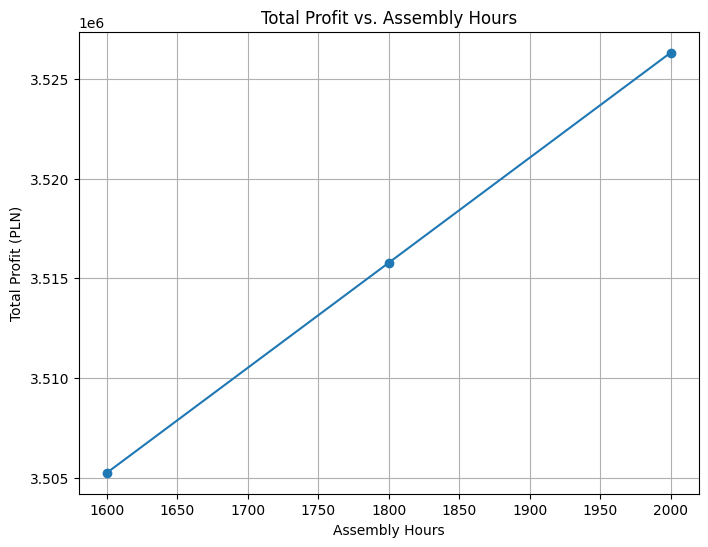

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(results_df['Assembly_Hours'], results_df['Total_Profit'], marker='o')
plt.title('Total Profit vs. Assembly Hours')
plt.xlabel('Assembly Hours')
plt.ylabel('Total Profit (PLN)')
plt.grid(True)
plt.show()

## Implement exercise 3 (optional)

### Subtask:
Add a binary variable to the model to represent a production line decision and observe the solver's output.


**Reasoning**:
Create a new LpProblem instance, define decision variables including a binary variable for the production line, the objective function, and the constraints including the dependency on the binary variable. Then solve the problem and print the results.



In [10]:
from pulp import (
    LpProblem,
    LpVariable,
    LpMaximize,
    LpInteger,
    LpContinuous,
    LpBinary,
    value,
    PULP_CBC_CMD,
    LpStatus
)

# 1) Create a new LpProblem instance for this exercise.
prob_binary = LpProblem("Production_Problem_Binary_Line", LpMaximize)

# 2) Define decision variables
A = LpVariable("A", lowBound=0, cat=LpInteger)
B = LpVariable("B", lowBound=0)
C = LpVariable("C", lowBound=0)
open_line = LpVariable("open_line", cat=LpBinary) # Binary variable for production line

# 3) Define the objective function
profit_A = 400
profit_B = 300
profit_C = 200

prob_binary += profit_A*A + profit_B*B + profit_C*C, "Profit_Objective"

# 4) Define the resource constraints with dependency on the binary variable
M = 10000 # A large number

# Assembly constraint: 1800 hours if line is open, effectively unlimited if closed
prob_binary += 0.3*A + 0.1*B + 0.1*C <= 1800 + M * (1 - open_line), "Assembly_Hours"
prob_binary += 0.1*A + 0.08*B + 0.04*C <= 800, "Quality_Control_Hours"
prob_binary += 0.06*A + 0.04*B + 0.05*C <= 700, "Packaging_Hours"

# 5) Include the minimum demand constraints
prob_binary += A >= 100, "Min_Demand_A"
prob_binary += B >= 50,  "Min_Demand_B"
prob_binary += C >= 80,  "Min_Demand_C"

# 6) Add constraints linking production to the binary variable
# If the line is closed (open_line = 0), production must be 0
prob_binary += A <= M * open_line, "Production_A_depends_on_line"
prob_binary += B <= M * open_line, "Production_B_depends_on_line"
prob_binary += C <= M * open_line, "Production_C_depends_on_line"


# 7) Solve the linear programming problem
prob_binary.solve(PULP_CBC_CMD(msg=False))

# 8) Print the status of the solution and the optimal values
print("--- Solution with Binary Production Line Decision ---")
print("Status:", LpStatus[prob_binary.status])
for v in prob_binary.variables():
    print(v.name, "=", v.varValue)

print("Total profit = ", value(prob_binary.objective))

--- Solution with Binary Production Line Decision ---
Status: Optimal
A = 1894.0
B = 2948.1667
C = 9368.6667
open_line = 1.0
Total profit =  3515783.3499999996


## Implement bonus

### Subtask:
Add sliders to the notebook to interactively change the values of variables and constraints.


**Reasoning**:
Implement the function to solve the optimization problem with interactive inputs and create the necessary widgets.



In [11]:
import ipywidgets as widgets
from IPython.display import display
from pulp import (
    LpProblem,
    LpVariable,
    LpMaximize,
    LpInteger,
    LpContinuous,
    value,
    PULP_CBC_CMD,
    LpStatus
)

def solve_optimization_interactive(profit_A_value, profit_B_value, profit_C_value, assembly_hours_limit, quality_control_hours_limit, packaging_hours_limit, min_demand_A, min_demand_B, min_demand_C):
    # Create the optimization problem (maximize profit).
    prob = LpProblem("Interactive_Production_Problem", LpMaximize)

    # Define Decision Variables
    A = LpVariable("A", lowBound=0, cat=LpInteger)  # must be integer
    B = LpVariable("B", lowBound=0)  # continous meters of plywood
    C = LpVariable("C", lowBound=0)  # continous meters of low quality plywood

    # Define Objective Function
    prob += profit_A_value*A + profit_B_value*B + profit_C_value*C, "Profit_Objective"

    # Define Constraints with interactive values
    prob += 0.3*A + 0.1*B + 0.1*C <= assembly_hours_limit, "Assembly_Hours"
    prob += 0.1*A + 0.08*B + 0.04*C <= quality_control_hours_limit, "Quality_Control_Hours"
    prob += 0.06*A + 0.04*B + 0.05*C <= packaging_hours_limit, "Packaging_Hours"

    # Minimum Demand Constraints with interactive values
    prob += A >= min_demand_A, "Min_Demand_A"
    prob += B >= min_demand_B,  "Min_Demand_B"
    prob += C >= min_demand_C,  "Min_Demand_C"

    # Solve the problem
    prob.solve(PULP_CBC_CMD(msg=False))  # CBC solver

    # Return results
    results = {
        "status": LpStatus[prob.status],
        "A": A.varValue,
        "B": B.varValue,
        "C": C.varValue,
        "total_profit": value(prob.objective) if prob.status == LpStatusOptimal else None
    }

    return results

# Define slider widgets for interactive parameters
profit_A_slider = widgets.FloatSlider(value=400, min=0, max=800, step=10, description='Profit A', continuous_update=False)
profit_B_slider = widgets.FloatSlider(value=300, min=0, max=600, step=10, description='Profit B', continuous_update=False)
profit_C_slider = widgets.FloatSlider(value=200, min=0, max=400, step=10, description='Profit C', continuous_update=False)
assembly_hours_slider = widgets.IntSlider(value=1800, min=1000, max=3000, step=100, description='Assembly Hours', continuous_update=False)
quality_control_hours_slider = widgets.IntSlider(value=800, min=400, max=1200, step=50, description='Quality Control Hours', continuous_update=False)
packaging_hours_slider = widgets.IntSlider(value=700, min=300, max=1000, step=50, description='Packaging Hours', continuous_update=False)
min_demand_A_slider = widgets.IntSlider(value=100, min=0, max=500, step=10, description='Min Demand A', continuous_update=False)
min_demand_B_slider = widgets.IntSlider(value=50, min=0, max=300, step=10, description='Min Demand B', continuous_update=False)
min_demand_C_slider = widgets.IntSlider(value=80, min=0, max=400, step=10, description='Min Demand C', continuous_update=False)

# Output widget to display results
output = widgets.Output()

# Function to update results when any slider changes
def update_results(change):
    with output:
        output.clear_output()
        results = solve_optimization_interactive(
            profit_A_slider.value,
            profit_B_slider.value,
            profit_C_slider.value,
            assembly_hours_slider.value,
            quality_control_hours_slider.value,
            packaging_hours_slider.value,
            min_demand_A_slider.value,
            min_demand_B_slider.value,
            min_demand_C_slider.value
        )
        print(f"Status: {results['status']}")
        print(f"A = {results['A']}")
        print(f"B = {results['B']}")
        print(f"C = {results['C']}")
        print(f"Total profit = {results['total_profit']}")

# Observe changes in each slider
profit_A_slider.observe(update_results, names='value')
profit_B_slider.observe(update_results, names='value')
profit_C_slider.observe(update_results, names='value')
assembly_hours_slider.observe(update_results, names='value')
quality_control_hours_slider.observe(update_results, names='value')
packaging_hours_slider.observe(update_results, names='value')
min_demand_A_slider.observe(update_results, names='value')
min_demand_B_slider.observe(update_results, names='value')
min_demand_C_slider.observe(update_results, names='value')


# Display the sliders and output
display(profit_A_slider, profit_B_slider, profit_C_slider)
display(assembly_hours_slider, quality_control_hours_slider, packaging_hours_slider)
display(min_demand_A_slider, min_demand_B_slider, min_demand_C_slider)
display(output)

# Initial run to display results on load
update_results(None)

FloatSlider(value=400.0, continuous_update=False, description='Profit A', max=800.0, step=10.0)

FloatSlider(value=300.0, continuous_update=False, description='Profit B', max=600.0, step=10.0)

FloatSlider(value=200.0, continuous_update=False, description='Profit C', max=400.0, step=10.0)

IntSlider(value=1800, continuous_update=False, description='Assembly Hours', max=3000, min=1000, step=100)

IntSlider(value=800, continuous_update=False, description='Quality Control Hours', max=1200, min=400, step=50)

IntSlider(value=700, continuous_update=False, description='Packaging Hours', max=1000, min=300, step=50)

IntSlider(value=100, continuous_update=False, description='Min Demand A', max=500, step=10)

IntSlider(value=50, continuous_update=False, description='Min Demand B', max=300, step=10)

IntSlider(value=80, continuous_update=False, description='Min Demand C', max=400, step=10)

Output()

## Summary:

### Data Analysis Key Findings

*   The initial optimization run with minimum demands (A=100, B=50, C=80) yielded an optimal and feasible solution with a total profit of approximately \$3,515,783.35.
*   In the initial scenario, the Quality Control and Packaging hours constraints were binding, indicating full utilization of these resources.
*   Increasing the minimum demand for product A from 100 to 200 did not alter the optimal production quantities or the total profit in the second scenario, suggesting the initial optimal production levels already exceeded the increased minimum demand.
*   The Quality Control and Packaging hours constraints remained binding even with the altered minimum demand for product A.
*   Varying assembly hours demonstrated a positive correlation between increased assembly hours and total profit.
*   Introducing a binary variable for a production line decision resulted in an optimal solution where the production line was opened, leading to the same optimal production quantities and profit as the initial scenario.
*   Interactive sliders were successfully implemented to allow real-time modification of profit coefficients, resource limits, and minimum demands, providing a dynamic way to explore the problem space.

### Insights or Next Steps

*   The analysis of binding constraints is crucial for identifying bottlenecks in the production process. Further investigation into increasing the capacity of Quality Control and Packaging hours could potentially lead to higher profits.
*   While increasing the minimum demand for product A in the tested range did not change the optimal solution, exploring larger increases or changes in minimum demands for other products could reveal different binding constraints and impact the optimal production plan.
